### Importing Libraries

In [1]:
#import statements for numpy and pandas
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder

### Reading the Data

In [3]:
df = pd.read_csv('./spam.csv', encoding='ISO-8859-1') #import dataset and path of dataset
le = LabelEncoder()
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1) #drop the unwanted columns

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df[df['v1'] == 'spam']

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [7]:
df[df.v1 == 'spam'].shape[0]

747

In [8]:
data = df.to_numpy()

In [9]:
X = data[:, 1]
y = data[:, 0]

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepthi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [12]:
tokenizer = RegexpTokenizer('\w+')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
def stemText(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text) # breaks into small words
    removed_stopwords = [w for w in tokens if w not in stop_words]
    stemmed_words = [ps.stem(token) for token in removed_stopwords]
    clean_text = ' '.join(stemmed_words)
    return clean_text

In [14]:
def getDoc(document):
    d = []
    for text in document:
        d.append(stemText(text))
    return d

In [15]:
clear_text = getDoc(X)

In [16]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [17]:
clear_text[1:10]

['ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send å 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea å 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()

In [20]:
vc = cv.fit_transform(clear_text)

In [21]:
X = vc.todense()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

### LOGISTIC REGRESSION 
Logistic Regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function.

In [24]:
# Importing algorithm
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9809679173463839

In [26]:
messages = [
  """ Urgent open this email and click on this link to get a million dollars cash and benifits 
  https://x.asf.xgaefh.com """, "Please come home early today!!"
           ]

In [27]:
def predict_text(new_text):
    d = getDoc(new_text)
    return cv.transform(d)

clean_messages = predict_text(messages)

In [28]:
y_pred = model.predict(clean_messages)
y_pred

array(['spam', 'ham'], dtype=object)

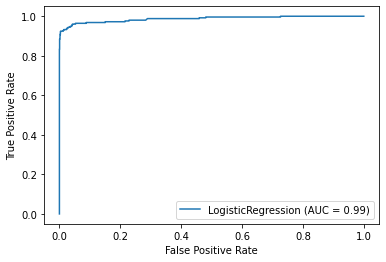

In [29]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine

mnb = model.fit(X_train, y_train)
mnb.score(X_test, y_test)

mnb_disp = plot_roc_curve(mnb, X_test, y_test)